# Sparks- Data Science &Business Analytics Internship


# Task1: Prediction Supervised Machine Learning
In this notebook I am using Pyhton sclkit-Learn library for machine learning to implement simple linear regression funtions.

# Simple Linear Regression

This task focuses on predicting the score obtained by a student based on the number of study hour.For the prediiction.Linear Regression model under supervised ML is employed.


Based on Data Scource: http://bit.ly/w-data

# Performed By:Shreya Verma


# Importing Libraries

In [8]:
# Importing all required libraries
import pandas as pd # used for data processing and analysis
import numpy as np # used for various array's operation
import matplotlib.pyplot as plt # used for data visualization
%matplotlib inline


# Loading Datasheet

In [10]:
# Reading Data remote link
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
print("Data imported successfully")

s_data.head(5)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [11]:
s_data.shape # get no.of rows and columns from dataset

(25, 2)

In [13]:
s_data.describe() # get summary of statistical details pertaining to columns of dataset

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [14]:
s_data.info() # get concise summary/ basic information  of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


# Plotting Graph
# Now plotting the data points in 2D graph to eyeball our dataset and see

If we can  manually find any relationship between the data

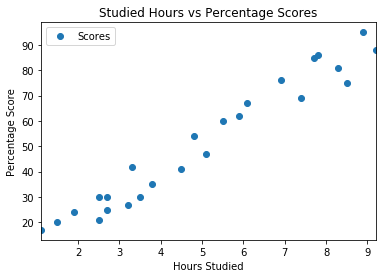

In [23]:
# Plotting the distribution of scores

s_data.plot(x='Hours', y='Scores', style='o')
plt.title('Studied Hours vs Percentage Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()


From the graph above,we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

# Preparing  The Data

#The next step is to divide the data into "attreibutes"(inputs) and "labels"(ouputs)

In [24]:
X=s_data.iloc[:, :-1].values # attribtes as inputs
Y=s_data.iloc[:, 1].values  # labels as output

In [27]:
print('inputs:\n')
print(X)

inputs:

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


In [28]:
print('outputs:\n')
print(Y)

outputs:

[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


# Splitting The Dataset Into Training And Testing Datasets

1.Now we have out attributes as inputs and labels as ouputs.

2.The next step is to split this data into training and test sets.

3.For this we will be using Python's Scikit-Learn's built-in_train_testsplit()method:

In [36]:
# importing the method called train_test_split from sklearn's model_selection
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=0)

# Training The Algorithm

1.Now,we have split the data into training and testing sets.

2.And now finally we'll train out algorithm.


In [37]:
 from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
    
print("Training Complete")

Training Complete


# Plotting Regression

1.As we havetrained our algorithm of regression.

2.Now we'll plot it in a graph.

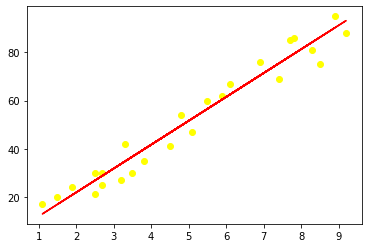

In [43]:
# Plotting the regression line
line = regressor.coef_*X + regressor.intercept_

# Plotting for the test data 
plt.scatter(X, Y, color='yellow')
plt.plot(X, line, color='red');
plt.show()

# Making Predictions

1.As we have trained our algorithm and see in a graph

2.Now we'll make some predictions. 

In [44]:
#First printing the testing data(in hours)
print(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [47]:
#Now we'll predict the scores (in percentage)
Y_predict = regressor.predict(X_test) #Predicting the scores
print (Y_predict)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [48]:
#Comparing Actual data vs Predicted data
df= pd.DataFrame({'Actual':Y_test, 'Predicted': Y_predict})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# Predicting Score If A Student Studies For 9.25 Hours

In [51]:
# Now I will predict with my own data
hours=9.25
my_predict =  regressor.predict([[hours]])
print("No ofHours a student studies = {}".format(hours))
print("Predicted Score of marks in % = {}".format(my_predict[0]))


No ofHours a student studies = 9.25
Predicted Score of marks in % = 93.69173248737538


# Evaluating The Model

Finally we'll be evaluating the performance  of the algorithm.

By calulating some metrices like mean square error,etc.


In [53]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(Y_test, Y_predict))


Mean Absolute Error: 4.183859899002975


In [54]:
print('Mean squared Error:',metrics.mean_squared_error(Y_test, Y_predict))

Mean squared Error: 21.5987693072174


In [56]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_predict)))

Root Mean Squared Error: 4.6474476121003665


# Checking Accuracy Of The Model

R squared value is close to 1, this is good model

In [57]:
regressor.score(X,Y)

0.9526947647057274

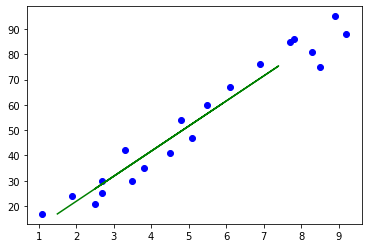

In [60]:
plt.scatter(X_train, Y_train, color='blue')
plt.plot(X_test, Y_predict, color='green')
plt.show()

Our model is 95.26% accurate